# Machine Learning Engineer Nanodegree
## Supervised Learning
Jonathan J. Hull, Jan. 29, 2017
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Note:

Extra work was done, over and above the minimum required for the project.  This is indicated by sections with the **Extra: ...** heading.  

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline
inline_rc = dict(mpl.rcParams)

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=3))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [3]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[data['income']==">50K"].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[data['income']=="<=50K"].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = 100.0*(float(n_greater_50k)/n_records)

# count num. missing across both dimensions of data
num_missing    = data.isnull().sum().sum()
num_data_items = data.shape[1]
num_entries    = n_records*num_data_items
pct_missing    = 100.0*(float(num_missing))/num_entries

# Print the results
print "Total number of records: {}".format(n_records)
print "%d data items for each record: (%s)\n" % (num_data_items, list(data))
print "%d=%f%% out of %d entries in input data are missing\n" % (num_missing,pct_missing,num_entries)

print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
14 data items for each record: (['age', 'workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

0=0.000000% out of 633108 entries in input data are missing

Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


## Extra: Visualization of Categorical Features

The code shown below was developed to visualize the categorical features as horizontal bar plots.  The objective was to better understand the content of the features as part of selecting the most appropriate supervised learning algorithm.

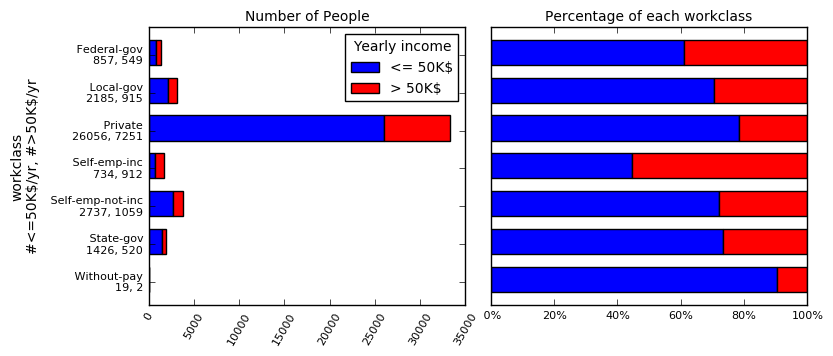

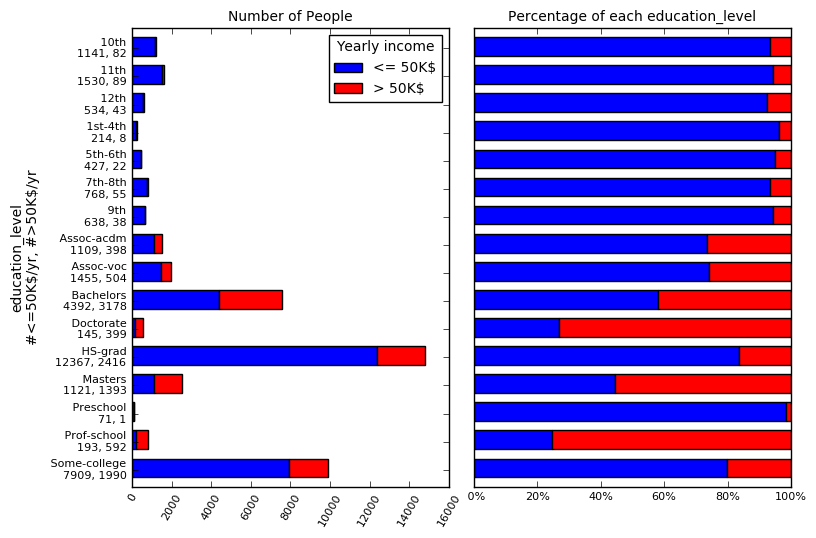

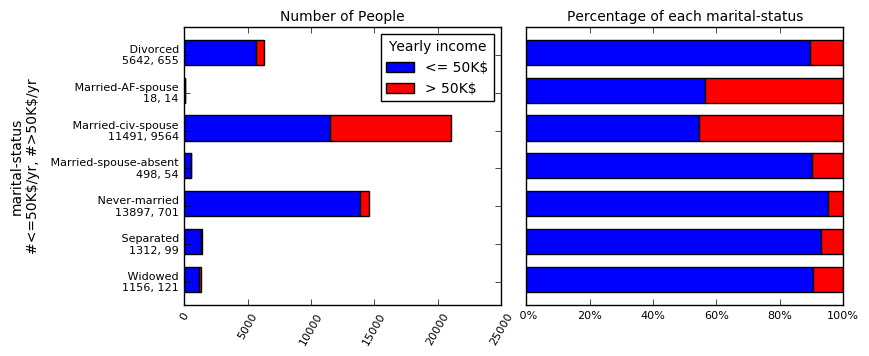

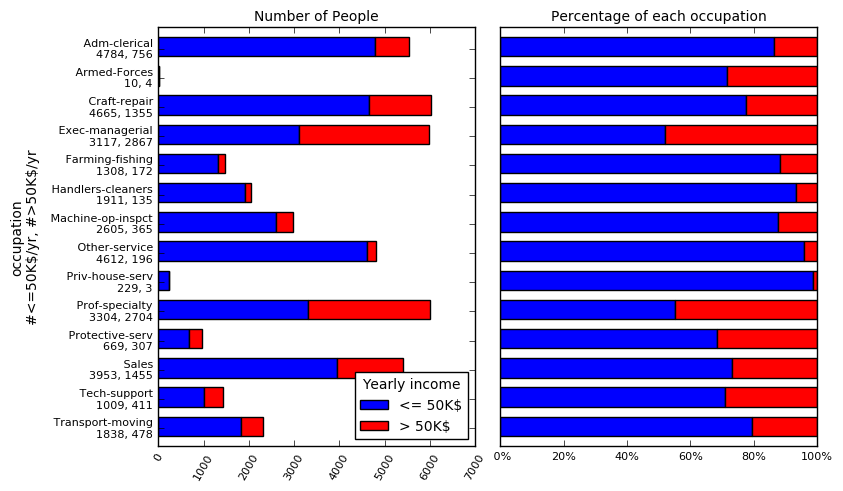

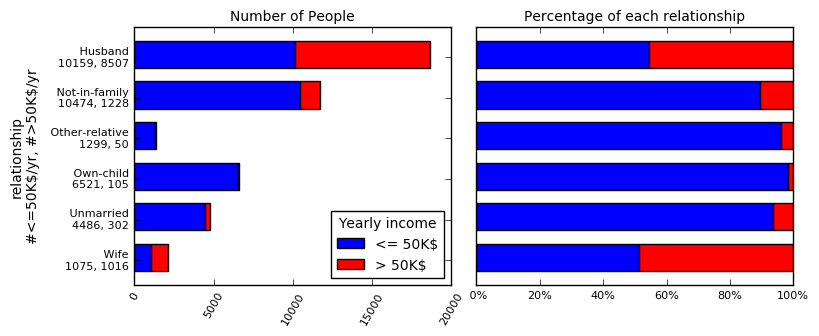

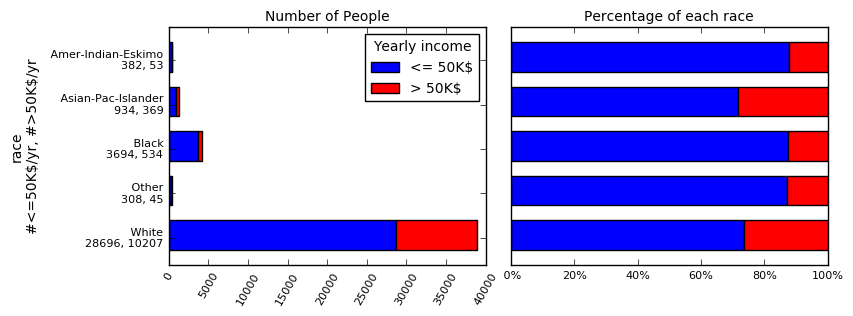

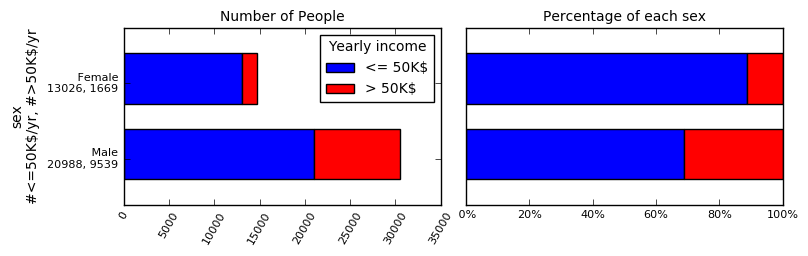

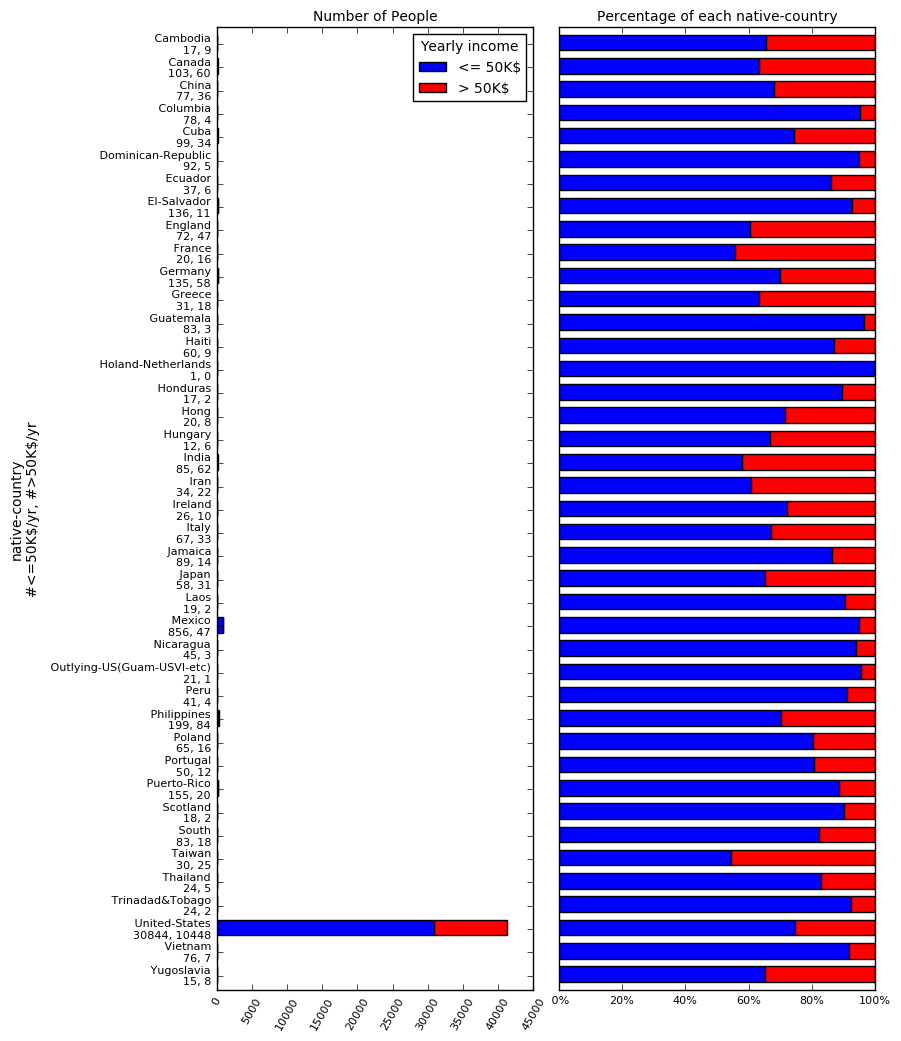

In [4]:
## Extra code for visualization of categorical variables

from IPython.core.display import ( display, HTML )

#def insert_vertical_space():
#   display(HTML('<p STYLE=\"padding-bottom: 1cm\"></p>'))
    
import matplotlib.patches as mpatches

def init_titles(secnum, varnum, varname):
    num_title      = "Number and Percentage of People of each <u>%s</u> per Yearly Income Level" % varname
    section_title  = "<h3 STYLE=\"padding-bottom: 0.5cm\">%d.%d %s</h3>" % (secnum, varnum, num_title)
    return(num_title, section_title)

def init_axis(fig, spec, title, ytick_locs) :
    ax = fig.add_subplot(spec)
    ax.set_title(title, fontsize=10)
    ax.set_ylim(0.0, 1.0)
    #ax2.get_yaxis().set_visible(False)
    ax.tick_params(axis='both', labelsize=8)
    ax.set_yticks(ytick_locs)
    return(ax)

#
# barh_yaxis_spec(): divide the vertical axis into a number of segments (num_segs), set the bar height 
#    and gap height as well as the starting point for each bar on the y axis.

def barh_yaxis_spec( num_bars ):
    num_ysegs      = 3.0*num_bars + 1
    bar_height     = 2.0/num_ysegs
    gap_height     = 1.0/num_ysegs
    ytick_locs     = [(i+1)*gap_height + i*bar_height + 0.4*bar_height for i in range(num_bars-1,-1,-1)]
    return( bar_height, gap_height, ytick_locs )

def draw_legend(ax, legend_text, legend_colors, legend_title, legend_loc):
    recs = [mpatches.Rectangle((0,0),1,1,fc=color) for color in legend_colors ]
    ax.legend(recs, legend_text, loc=legend_loc, fontsize='medium', title=legend_title)

#
#  plot_categorical(): plot two horizontal bar charts next to each other.  The first one shows the
#    frequency of each feature measurement and the income level within each one.  The second chart shows the
#    percentge of each income level within each feature measurement.
#
def plot_categorical(secnum, varnum, varname, legend_loc):
    
    num_title, section_title = init_titles(secnum, varnum, varname)
    display(HTML(section_title))
    #
    #  the crosstab table provides the data for our graphs
    #    calculate the heights of each bar on both charts as well
    #    as the labels for each axis.
    #
    crosstab_table = pd.crosstab(data[varname], data.income, margins=True)
    num_bar_list   = crosstab_table.values.tolist()
    num_bar_list   = [l[:-1] for l in num_bar_list][:-1] # chop off the row sum
    prop_bar_list  = [[float(i)/sum(l) for i in l] for l in num_bar_list]

    rowLabels      = list(crosstab_table.index)
    colLabels      = list(crosstab_table)
    num_bars       = len(rowLabels) - 1  # we don't plot the column totals
    #
    #  calculate the height of each bar, the space between them, and their location
    #
    bar_height, gap_height, ytick_locs = barh_yaxis_spec( num_bars )
    
    fig = plt.figure()
    
    #
    #  Initialize the plot of frequencies of feature measurements and income levels within them
    #
    ax1 = init_axis(fig, 121, 'Number of People', ytick_locs)
    for tick in ax1.get_xticklabels(): tick.set_rotation(60)
    ax1.set_yticklabels(["%s\n%d, %d" % (s[0],s[1][0],s[1][1]) for s in zip(rowLabels,num_bar_list)])
    ax1.set_ylabel("%s\n#<=50K\$/yr, #>50K\$/yr" % varname)
    draw_legend(ax1,['<= 50K\$','> 50K\$'], ['b','r'], 'Yearly income', legend_loc)
    
    #
    #  Initialize the plot of percentages or proportions of feature measurements and income levels
    #
    ax2 = init_axis(fig, 122, 'Percentage of each %s' % varname, ytick_locs)
    ax2.set_xticklabels(["%2.0f%%" % (100.0*s) for s in ax2.get_xticks().tolist()])
    ax2.get_yaxis().set_visible(False)
    #ax2.set_yticklabels(["%2.0f%%" % (100.0*s[0]) for s in prop_bar_list])

    #
    #  Draw the horizontal bar charts.  Start from the top and work down.
    #    Initially, ybar is the location of the bar at the top of thee chart.
    #
    ybar = float((num_bars-1)) * (gap_height+bar_height) + gap_height
    for i in range(num_bars) :
        ax1.barh([ybar,ybar], num_bar_list[i],  left=[0,num_bar_list[i][0]],
             color=['b','r'], height=[bar_height,bar_height])
        ax2.barh([ybar,ybar], prop_bar_list[i], left=[0,prop_bar_list[i][0]],
             color=['b','r'], height=[bar_height,bar_height])
        ybar -= gap_height+bar_height

    #plt.tight_layout()
    fig.subplots_adjust(wspace=0.08)
    fig.set_size_inches(8.5, (2.0*num_bars*0.04*3.25 + 2.0*0.04*3.25 + 1.5))
    plt.show()

################################
##
##  Begin main program
##

display(HTML('<h2>Extra: 1. Visualization of Categorical Variables</h2>'))

for i,varname in enumerate(['workclass','education_level','marital-status','occupation','relationship',\
                'race','sex','native-country']):
    legend_loc = 'upper right'
    if (varname == 'occupation' or varname == 'relationship'): legend_loc = 'lower right'
    plot_categorical(1, i+1, varname, legend_loc)

## Extra: Visualization of Numerical Variables

The following code displays stacked histograms for the numeric variables 'age', 'education-num', 'hours-per-week', 'capital-gain', and 'capital-loss.'  Because of the skewed nature of the capital-gain and loss features (they include many entries equal to zero), we included the capability to generate histograms that exclude zeroes in the data.  

We plot the histogram of frequency of occurrence of each feature as a bar chart.  We also display another graph for each feature that shows the proportion of each bar that's in each income group (<=50K and >50K).  

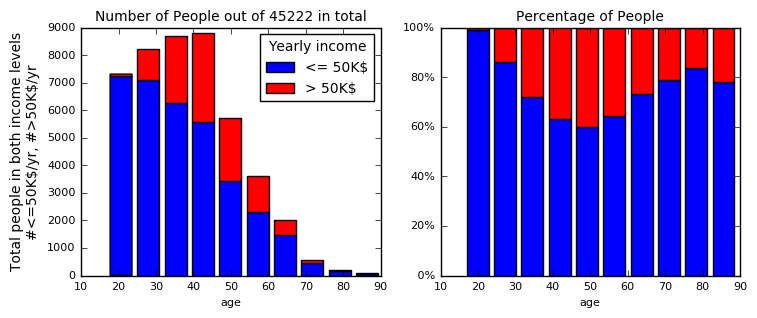

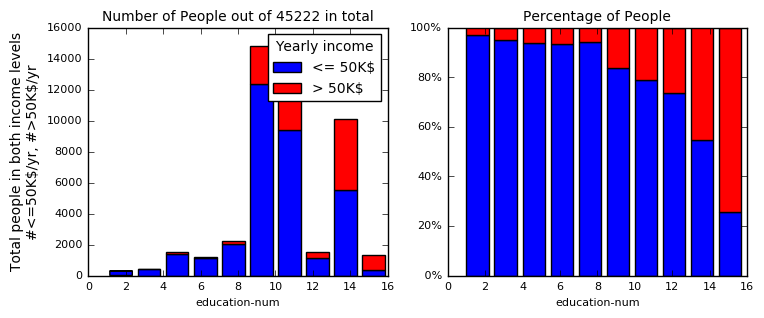

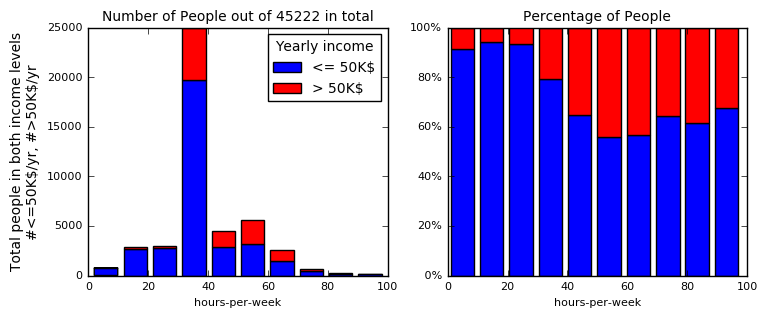

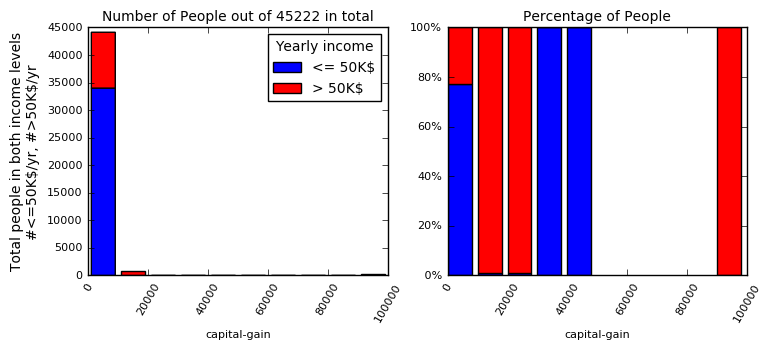

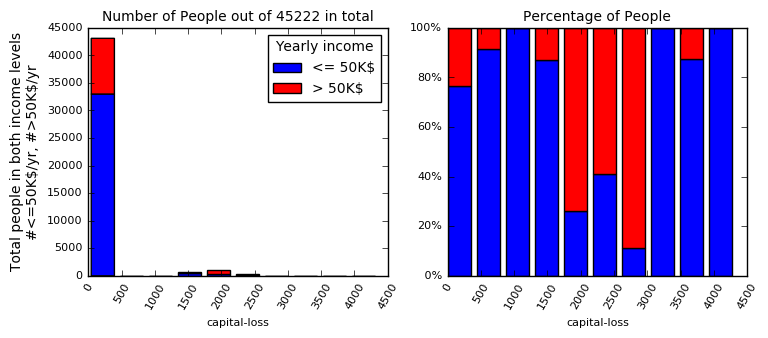

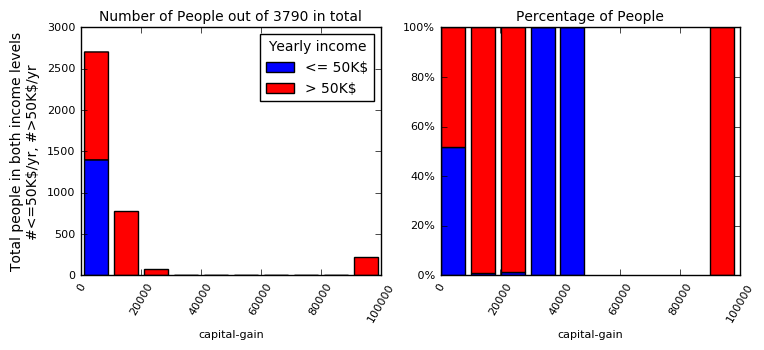

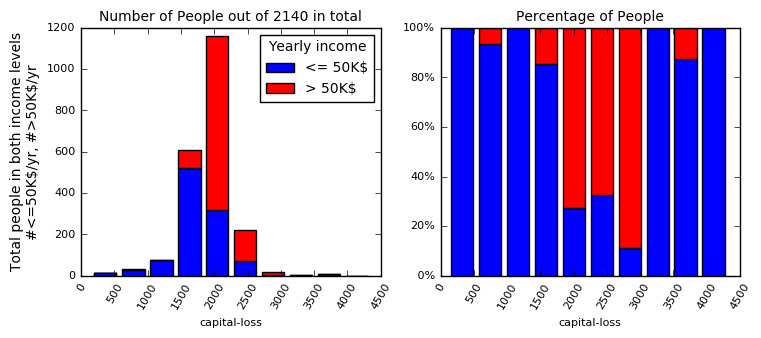

In [5]:
##  Extra code for visualization of numerical variables

def init_titles(secnum, varnum, varname, eliminate_zeroes):
    num_title      = "Number and Percentage of People of each <u>%s</u> per Yearly Income Level" % varname
    if (eliminate_zeroes): num_title += " (ignoring zeroes)"
    section_title  = "<h3 STYLE=\"padding-bottom: 0.5cm\">%d.%d %s</h3>" % (secnum, varnum, num_title)
    return(num_title, section_title)

def init_numeric_figure(ax, title, xlabel):
    ax.tick_params(axis='both', labelsize=8)
    ax.set_title(title, fontsize=10)
    ax.set_xlabel(xlabel, fontsize=8)
    if (xlabel == 'capital-gain' or xlabel == 'capital-loss'):
        for tick in ax.get_xticklabels(): tick.set_rotation(60)
    
def setup_numeric_figure(num_samples, varname):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax0, ax1  = axes.flatten()
    init_numeric_figure(ax0, "Number of People out of %d in total" % num_samples, varname)
    init_numeric_figure(ax1, "Percentage of People", varname)
    return( fig, ax0, ax1 )

#
#  get_slice(): get subset of the data for the given feature (varname) and income level (test)
#    If eliminate_zeroes is true, only return data with a non zero value for varname.
#
def get_slice(data, test, varname, eliminate_zeroes):
    res = np.array(data[data['income'] == test][varname])
    if (eliminate_zeroes): res = res[ res[:] > 0 ]
    return(res)
#
#  select_data(): return subsets of data for the specified feature(varname) for each income level
#
def select_data(data, varname, eliminate_zeroes):
    le50k = get_slice(data, '<=50K', varname, eliminate_zeroes)
    gt50k = get_slice(data, '>50K', varname, eliminate_zeroes)
    return( le50k, gt50k, len(le50k)+len(gt50k) )

def draw_legend(ax, legend_text, legend_colors, legend_title):
    recs = [mpatches.Rectangle((0,0),1,1,fc=color) for color in legend_colors ]
    ax.legend(recs, legend_text, loc='upper right', fontsize='medium', title=legend_title)

#
#  plot_numerical(): draw stacked histogram of frequency of occurrence of the specified feature (varname)
#     including the number of people at both income levels within each feature value.  Also draw the
#     corresponding proportional histogram scaled across each feature value.
#
def plot_numerical(data, secnum, varnum, varname, eliminate_zeroes):
    
    #
    #  Get subsets of the data at each income level for the given feature name (varname)
    #
    le50k, gt50k, num_samples = select_data(data, varname, eliminate_zeroes)
    
    num_title, section_title  = init_titles(secnum, varnum, varname, eliminate_zeroes)
    display(HTML(section_title))
    #
    # Initialize both figures
    #
    fig, ax0, ax1  = setup_numeric_figure(num_samples, varname)
    ax0.set_ylabel("Total people in both income levels\n#<=50K\$/yr, #>50K\$/yr")
    ax1.set_yticklabels(["%2.0f%%" % (100.0*s) for s in ax1.get_yticks().tolist()])
    #
    #  Draw the stacked bar histogram for both income income levels.  Keep its parameters so we can add data later.
    #
    nle50k, bins, patches = ax0.hist([le50k,gt50k], 10, histtype='barstacked',color=['b','r'],stacked=True)
    bar_width             = patches[0][0].get_width()
    draw_legend(ax0,['<= 50K\$','> 50K\$'], ['b','r'], 'Yearly income' )
    #
    #  Calculate the histogram for income levels > 50K
    #
    ngt50k, bin_edges = np.histogram( gt50k, bins=bins )
    #
    #  Calculate the histograms of proportions of each feature value at each income level
    #
    le50k = np.true_divide(nle50k[0], np.add(nle50k[0], ngt50k))
    gt50k = np.true_divide(ngt50k,    np.add(nle50k[0], ngt50k))
    #
    #  Draw the second histogram of proportions of each feature value at each income level
    #
    ax1.bar(bins[:-1], le50k, bar_width, color='b')
    ax1.bar(bins[:-1], gt50k, bar_width, bottom=le50k, color='r')
    
    fig.set_figwidth(8.5)
    fig.set_figheight(0.8*fig.get_figheight())
    plt.show()
    
################################
##
##  Begin main program
##

display(HTML('<h2>Extra: 2. Visualization of Numerical Variables</h2>'))
for i,varname in enumerate(['age', 'education-num', 'hours-per-week', 'capital-gain','capital-loss']):
    plot_numerical(data,2, i+1, varname, False)
plot_numerical(data, 2, i+2, 'capital-gain', True)
plot_numerical(data, 2, i+3, 'capital-loss', True)

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

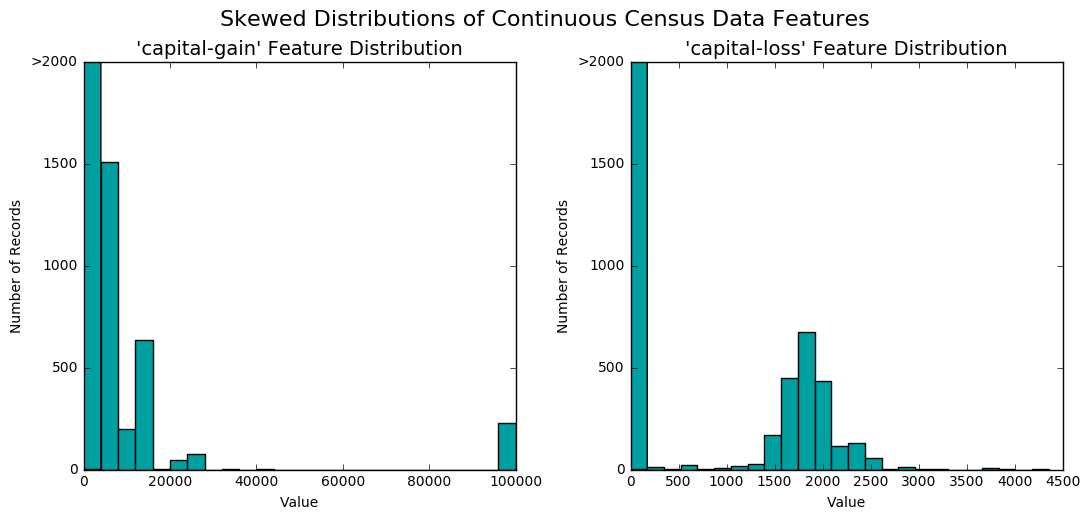

In [6]:
# Split the data into features and target label
income_raw   = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

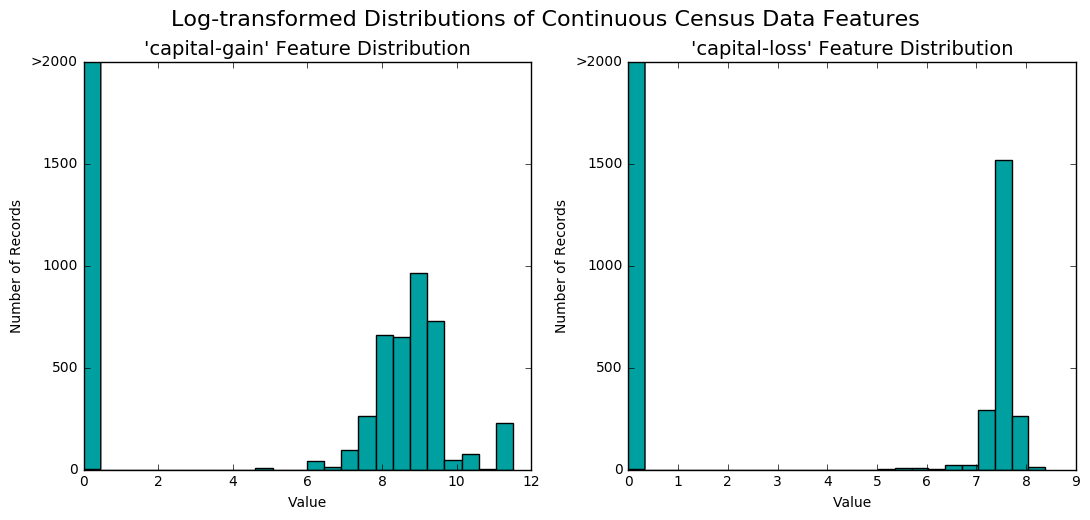

In [7]:
# Log-transform the skewed features
skewed               = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as shown below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [8]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler                  = MinMaxScaler()
numerical               = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [9]:
print "Features before preprocessing:"
display(features_raw[:3])

categorical = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship',
               'race', 'sex', 'native-country']

# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
#features = pd.get_dummies(features_raw, columns=categorical)
features = pd.get_dummies(features_raw)

print "Features after preprocessing:"
display(features[:3])

# TODO: Encode the 'income_raw' data to numerical values
#income = (income_raw[:] == '>50K').astype(int)
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

print("Confirm correctness of encoding.  The following number should be 11208: %d" % sum(income))

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
print encoded

Features before preprocessing:


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States


Features after preprocessing:


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.533333,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Confirm correctness of encoding.  The following number should be 11208: 11208
103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-ma

### Extra: Feature Evaluation

After data preparation, normalization and preprocessing we are left with 98 binary features (that were derived from the categorical variables) and five numeric features.  We now compute several statistics that give us some insight into the features that will be most useful for classifying an unknown sample and the type of classifier that's appropriate for the data set.

We calculate the **Pearson correlation** coefficient for each input variable compared to the outcome (<= 50K or >50K) and output the 10 most highly ranked (both positively and negatively) features.  High correlation values correspond to features that are often chosen first by automatic feature selection algorithms[1].  A downside is that Pearson's r  favors linear relationships between the feature and the outcome.  Nevertheless, it's still useful and we'll keep its linear sensitivity in mind.

We also calculate and plot the **correlation matrix** that shows the correlation between each pair of features.  By inspecting the plot, we can get some idea about the features that are highly correlated with each other.  This could be useful to know because algorithms such as logistic regression can perform poorly if we have highly correlated pairs of features.

#### References
[1]. http://blog.datadive.net/selecting-good-features-part-i-univariate-selection/


0.446 marital-status_ Married-civ-spouse
0.404 relationship_ Husband
0.333 education-num
0.237 age
0.227 hours-per-week
0.221 capital-gain
0.216 sex_ Male
0.209 occupation_ Exec-managerial
0.183 occupation_ Prof-specialty
0.179 education_level_ Bachelors


-0.320 marital-status_ Never-married
-0.223 relationship_ Own-child
-0.216 sex_ Female
-0.196 relationship_ Not-in-family
-0.165 occupation_ Other-service
-0.147 relationship_ Unmarried
-0.136 education_level_ HS-grad
-0.134 marital-status_ Divorced
-0.117 workclass_ Private
-0.096 occupation_ Adm-clerical


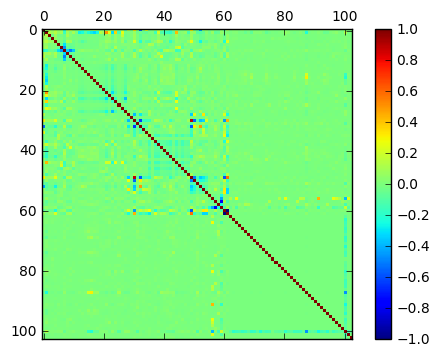

Note: dark colors indicate high correlation between a pair of features


marital-status_ Married-civ-spouse  relationship_ Husband          0.897220
relationship_ Husband               sex_ Male                      0.581588
education-num                       education_level_ Bachelors     0.506119
marital-status_ Never-married       relationship_ Own-child        0.498208
marital-status_ Married-civ-spouse  sex_ Male                      0.438136
race_ Asian-Pac-Islander            native-country_ Philippines    0.433898
education-num                       occupation_ Prof-specialty     0.425102
                                    education_level_ Masters       0.368898
marital-status_ Divorced            relationship_ Unmarried        0.332213
relationship_ Unmarried             sex_ Female                    0.321808
dtype: float64


sex_ Female                         sex_ Male                       -1.000000
race_ Black                         race_ White                     -0.796847
marital-status_ Married-civ-spouse  marital-status_ Never-married   -0.644439
relationship_ Husband               sex_ Female                     -0.581588
marital-status_ Never-married       relationship_ Husband           -0.578842
marital-status_ Married-civ-spouse  relationship_ Not-in-family     -0.549575
age                                 marital-status_ Never-married   -0.526862
workclass_ Private                  workclass_ Self-emp-not-inc     -0.506113
relationship_ Husband               relationship_ Not-in-family     -0.495362
dtype: float64


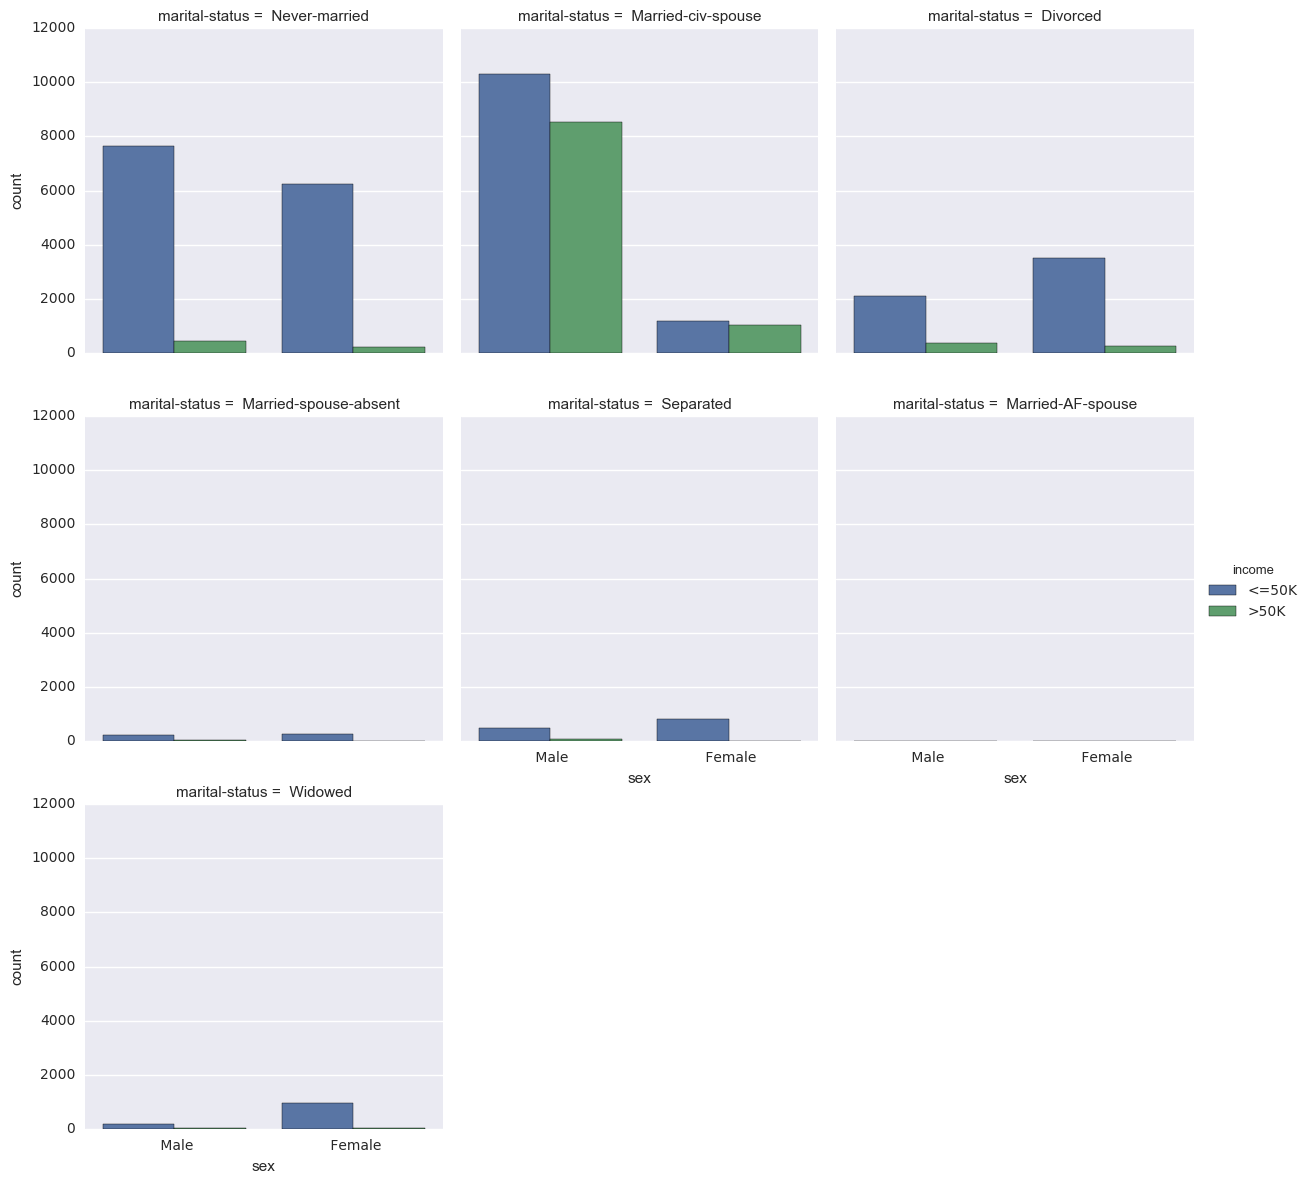

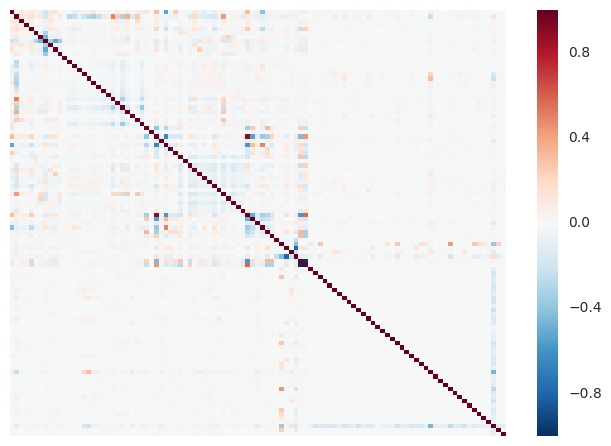

In [10]:
#
## Extra code for Feature Evaluation
#
# Print the 10 variables that have the highest correlations with income level
#

from scipy.stats import pearsonr

def print_pairs(title, the_pairs):
    display(HTML("<u>%s</u>" % title))
    for (i, pair) in enumerate(the_pairs):
        print "%1.3f %s" % (pair[1],pair[0])
    
display(HTML('<h2>Extra: Features most highly correlated with whether a person makes \$50,000 per year</h2>'))

corr = {}
for feature in features.columns:
    corr[feature] = pearsonr(features[feature],income)[0]
top10r = sorted(corr.iteritems(), key=lambda(key): key[1], reverse=True)[:10]

print_pairs("10 most positive correlations", top10r)
        
top10rneg = sorted(corr.iteritems(), key=lambda(key): key[1])[:10]
print_pairs("10 most negative correlations", top10rneg)

#
#  Calculate and plot the feature correlation matrix and the top 10 pairs (pos. and neg.)
#

def plot_and_print_topN(df, start, N):
    display(HTML('<h2>Extra: Correlation matrix for pairs of features</h2>'))
    fig = plt.figure()
    ax  = fig.add_subplot(111)
    cax = ax.matshow(df, vmin=-1, vmax=1)
    fig.colorbar(cax)
    plt.show()
    print "Note: dark colors indicate high correlation between a pair of features"
    # select and sort only the upper diagonal elements of the matrix
    keep        = np.triu(np.ones(df.shape)).astype('bool').reshape(df.size)
    new_df      = df.stack()[keep]
    sorted_vals = new_df.sort_values(ascending=False)
    
    display(HTML("\n<u>%s highly positive pairwise correlations</u>\n" % N))
    print(sorted_vals[ start : start+N]); # skip the correlations between features and themselves, they're always 1.0
    sorted_vals = new_df.sort_values(ascending=True)
    display(HTML("\n<u>%s highly negative pairwise correlations</u>\n" % N))
    print(sorted_vals[ 0 : N-1 ]);

plot_and_print_topN( features.corr(), len(features.columns), 10 )

display(HTML("<h2>Extras: Seaborn factor plot and heat map representation of pairwise correlations</h2>"))
display(HTML("<p>Examples of applying tools from the Seaborn package are shown below.</p>"))
    
import seaborn as sns
sns.factorplot("sex", col="marital-status", data=data, hue='income', kind="count", col_wrap=3);
plt.show()
sns.heatmap(features.corr(), annot = True, vmin=-1, vmax=1, xticklabels=False, yticklabels=False);
mpl.rcParams.update(inline_rc)

####################
## References
# http://stackoverflow.com/questions/34417685/melt-the-upper-triangular-matrix-of-a-pandas-dataframe
# http://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [11]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [12]:
# TODO: Calculate accuracy
accuracy = float(n_greater_50k)/n_records

# TODO: Calculate F-score using the formula above for beta = 0.5

beta           = 0.5
betasq         = beta*beta
true_positive  = n_greater_50k
false_positive = n_records - n_greater_50k
true_negative  = 0
false_negative = 0

precision      = float(true_positive)/(true_positive + false_positive)
recall         = float(true_positive)/(true_positive + false_negative)
fscore         = (1.0 + betasq) * ((precision*recall) / (betasq*precision + recall))

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

**Answer: **

Generally, tree-based techniques work well when we have mixtures of binary and continuous features and the data is not particularly sparse.  Since these are characteristics of the CharityML data set, the following three tree-based techniques, in order of increasing complexity, were investigated: simple decision trees and the ensemble techniques of random forests and gradient-boosted decision trees.

**1. Decision Trees**

a. Real world example -- Decision trees have been used as part of online recommendation systems.  In this case [1], features about a person such as job title, age and marital status are used in a decision tree that determines whether the system should recommend that the person purchase a particular product.

b. Strengths of the model -- Typically, decision trees are very fast.  Decision trees work well on mixtures of categorical and numerical features and they can be visualized and understood by non-experts.  Easy visualization is a nice-to-have characteristic in the present application because we will need to describe how the model works to the sponsor (CharityML).  Decision trees are also completely invariant to scaling of the input data.  This is not a particular concern for us since we already applied scaling transformations, but it's good to keep in mind for future purposes.

c. Weaknesses of the model -- Decision trees are prone to overfitting and thus do not generalize well to unseen data.  

d. What makes this model a good candidate -- The strengths of decision trees match our data set and their weaknesses can be mitigated by adjustment of parameters that control the fitting of the tree (max_depth, max_left_nodes, min_samples_leaf).

**2. Random Forest**

a. Real world example -- Random forests have been used for land cover classification in remote sensing.  In this case [2], features derived from colors were used to classify areas of LANDSAT aerial images as being one of 14 categories (Urban, Poplar Grove, Conifers, Greenhouses, Shrublands, Olive Grove, Grasslands, Oak Grove, Herb. Irrig., Lig. Irrig., Herb. Dry, Bare soils, Trop. Crops, Water).  

b. Strengths of the model - Random forests (RF) reduce the variance, as they are ensembles of trees (with some parameter tuning).  RF can be applied to mixtures of categorical and numeric features, it can learn non-linear decision boundaries, and as a tree-based technique it has reasonably fast classification time.  Overfitting can be mitigated with careful adjustment of the following parameters: n_estimators (number of trees in the forest), max_features (determines randomness of each tree), and max_depth (limits number of questions that are asked about each feature vector).  

c. Weaknesses of the model - Random forests don't work well on very high dimensional sparse data (e.g. text).  But this is not a concern in our application.  Memory requirement is proportional to KN where K is the number of trees in the forest and N is the dimension of the features.  Execution speed is longer than a simple decision tree (but still faster than other techniques), and the algorithm is prone to overfitting, although this can be mitigated by parameter adjustments at training time.

d. What makes this model a good candidate -- We have a mixture of categorical and numeric features.  With a 103-dimensional feature vector, the memory requirement is not a concern.  

**3. Gradient Boosting (Gradient Boosted Regression Trees (GBRT))**

a. Real world example -- Boosted decision trees have been applied to the discrimination of sounds produced by objects of interest (e.g. dog barks or car horns) from all other sounds [3].  Several other applications for gradient boosting have also been investigated [4-6].

b. Strengths of the model -- GBRT can be applied to mixtures of categorical and numeric features.  It reduces variance as it's an ensemble technique.  It combines multiple weak learners which can evantually lead to a more robust model.  GBRT supports different loss functions (e.g., huber), it automatically detects non-linear feature interactions, and it can fit noisy data.  In addition to adjusting the depth of the trees (max_depth) and the number of trees in the model (n_estimators), performance can be tuned with the learning_rate.  It controls how strongly each tree tries to correct mistakes of the previous trees.  A higher learning rate means each tree can make stronger corrections, allowing for more complex models.  Also, GBRT gives us a feature importance value, which we'll need later.

c. Weaknesses of the model --  GBRT requires careful tuning and can take a long time to train (but prediction is fast).  Also, GBRT does not work well on sparse, high dimensional data, but this is not a concern in the present application.

d.  What makes the model a good candidate --  Our data set contains a mixture of categorical and numeric features and it's not sparse (e.g., a collection of text).


**References**

[1]. Y.H. Cho, J.K. Kim, and S.H. Kim, "A personalized recommender system based on web usage mining and decision tree induction," Expert Systems with Applications,  v.23, 329–342, 2002. https://goo.gl/joJhi7

[2]. V.F. Rodriguez-Galiano, B. Ghimire, J. Rogan, M. Chica-Olmo, J.P. Rigol-Sanchez, "An assessment of the effectiveness of a random forest classifier for land-cover classification," ISPRS Journal of Photogrammetry and Remote Sensing, v. 67, 93–104, 2012.  https://goo.gl/io7bXh
 
[3]. D. Hoiem, Y. Ke, and R. Sukthankar, "SOLAR: Sound Object Localization and Retrieval in Complex Audio Environments," Proceedings of International Conference on Acoustics, Speech and Signal Processing, 2005.  https://goo.gl/CGYoFV

[4]. J. R. Leathwick1, J. Elith2, M. P. Francis, T. Hastie, and P. Taylor, "Variation in demersal fish species richness in the oceans surrounding New Zealand: an analysis using boosted regression trees," Marine Ecology Progress Series, Vol. 321: 267–281, 2006. https://goo.gl/f8YT5I

[5]. Souhaib Ben Taieb1 and Rob J Hyndman, "A gradient boosting approach to the Kaggle load forecasting competition," submitted to Int. Journal of Forecasting, April 29, 2013.  https://goo.gl/Of2amh

[6]. L. Guelman, "Gradient boosting trees for auto insurance loss cost modeling and prediction," Expert Systems with Applications, v.39, 3659–3667, 2012. https://goo.gl/wCU6ir

## Extra: Decision tree visualization

The decision tree visualization tool graphviz() was evaluated with the following example code.  For simplicity of this example, only the first two levels of the tree are shown.  We see the first test is whether the Married-civ-spouse feature is <= 0.5.  If it is, the capital gain feature is tested and if not, the education-num feature is tested.

This is a fantastic tool that I'm sure will be helpful in the future.  Thanks to the grader for pointing it out.

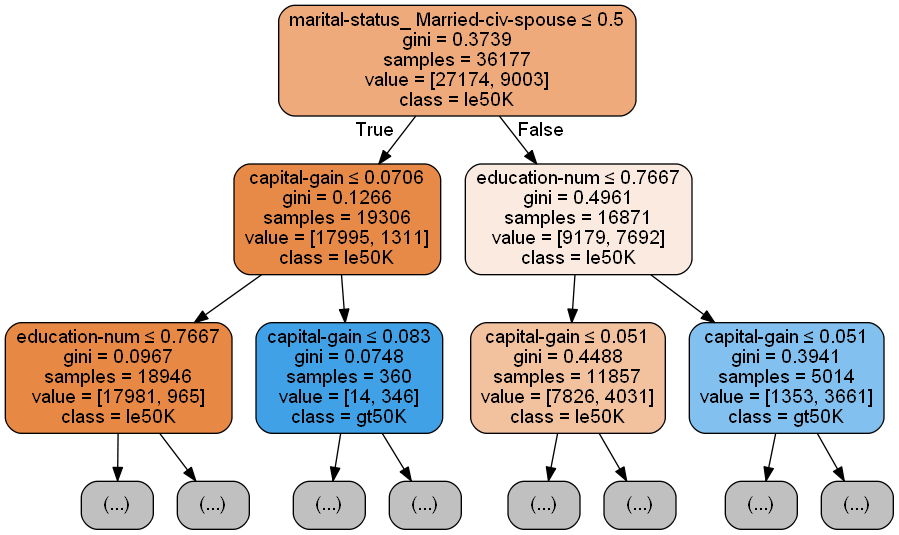

In [13]:
#
# derive a decision tree classifier for our data and plot its first two levels (below the root).
#  The purpose is to determine illustrate the utility of the graphviz visualization.
#
import pydotplus 
from IPython.display import Image
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(decision_tree=clf, filled=True, rounded=True, 
                                feature_names=features.columns, class_names=("le50K","gt50K"),
                                max_depth=2, special_characters=True, out_file='dot.dot')
graph = pydotplus.graphviz.graph_from_dot_file("dot.dot")
Image(graph.create_png())  

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [14]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start   = time() # Get start time
    clf     = learner
    learner = clf.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = "%0.4f" % (end-start)
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test  = clf.predict(X_test)
    predictions_train = clf.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = "%0.4f" % (end-start)
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = "%0.3f" % accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = "%0.3f" % accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = "%0.3f" % fbeta_score(y_train[:300], predictions_train, 0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = "%0.3f" % fbeta_score(y_test, predictions_test, 0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

DecisionTreeClassifier trained on 362 samples.
0: DecisionTreeClassifier: {'pred_time': '0.0120', 'f_test': '0.534', 'train_time': '0.0060', 'acc_train': '1.000', 'acc_test': '0.767', 'f_train': '1.000'}
DecisionTreeClassifier trained on 3618 samples.
1: DecisionTreeClassifier: {'pred_time': '0.1250', 'f_test': '0.599', 'train_time': '0.2790', 'acc_train': '0.997', 'acc_test': '0.804', 'f_train': '0.997'}
DecisionTreeClassifier trained on 36177 samples.
2: DecisionTreeClassifier: {'pred_time': '0.0320', 'f_test': '0.628', 'train_time': '3.3440', 'acc_train': '0.970', 'acc_test': '0.819', 'f_train': '0.964'}


RandomForestClassifier trained on 362 samples.
0: RandomForestClassifier: {'pred_time': '0.1000', 'f_test': '0.594', 'train_time': '0.0970', 'acc_train': '0.977', 'acc_test': '0.805', 'f_train': '0.979'}
RandomForestClassifier trained on 3618 samples.
1: RandomForestClassifier: {'pred_time': '0.1310', 'f_test': '0.661', 'train_time': '0.4650', 'acc_train': '0.983', 'acc_test': '0.

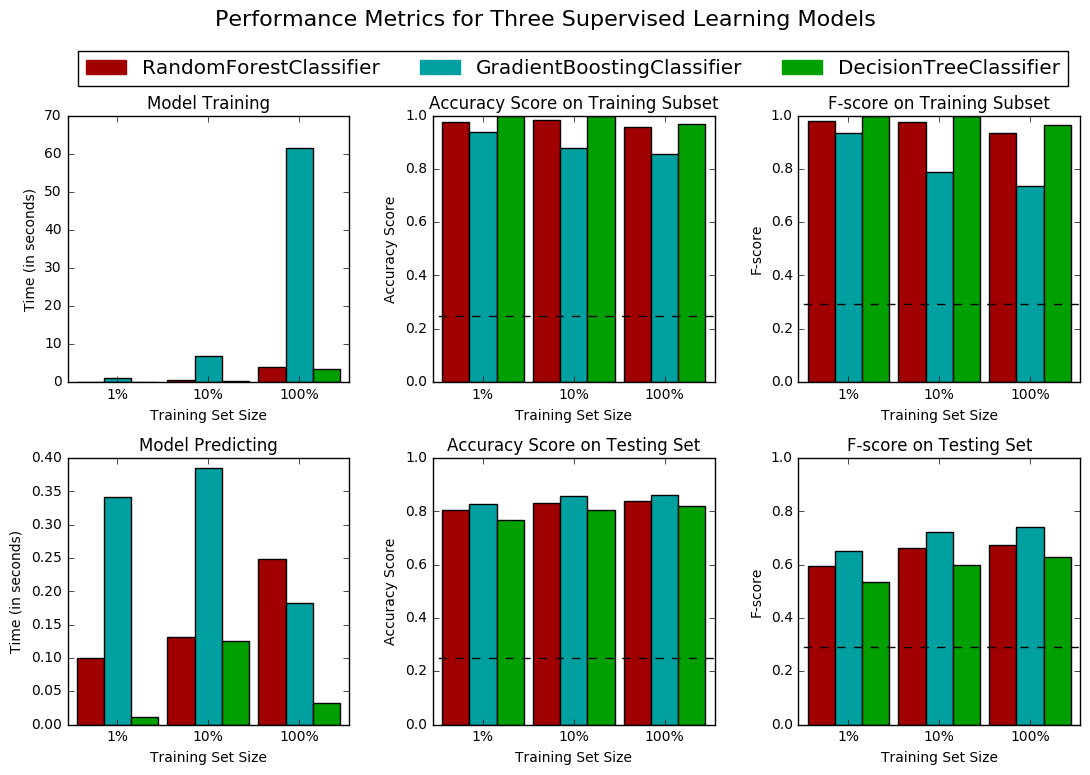

In [16]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree         import DecisionTreeClassifier
from sklearn.svm          import SVC
from sklearn.ensemble     import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier,\
                                 RandomForestClassifier
from sklearn.naive_bayes  import GaussianNB
from sklearn.neighbors    import KNeighborsClassifier

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
n_training  = X_train.shape[0]
samples_1   = int(round(0.01*n_training))
samples_10  = int(round(0.10*n_training))
samples_100 = n_training
    
def apply_three_classifiers( clf_A, clf_B, clf_C ) :
    # Collect results on the learners
    results = {}
    for clf in [clf_A, clf_B, clf_C]:
        clf_name = clf.__class__.__name__
        results[clf_name] = {}
        for i, samples in enumerate([samples_1, samples_10, samples_100]):
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
            print "%d: %s: %s" % (i, clf_name, results[clf_name][i])
        print "\n"

    # Run metrics visualization for the three supervised learning models chosen
    vs.evaluate(results, accuracy, fscore)
    
apply_three_classifiers( DecisionTreeClassifier(random_state=0), RandomForestClassifier(random_state=0),\
                         GradientBoostingClassifier(random_state=0))

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

**Answer: **  Based on the evaluation of three algorithms (decision tree, random forest, and gradient boosting), the gradient boosting classifier is most appropriate for identifying individuals that make more than $50,000.  It provided the highest accuracy and F scores on the test set.  The time required to classify the 9045 samples of test data, while the highest of the three candidate algorithms, still was only about 400 mS.  This is about four-hundreths of a millsecond per sample which is still plenty fast enough, especially considering that we will be classifying samples offline (a real-time response is not required).  The time needed to build the model was also the longest of the three at about 70 seconds but that's also something that's only done once before we classify unknown samples and is thus not a concern in our application.

It's also important that the algorithm we choose matches the characteristics of the data so that we obtain the best performance in practice.  In this case the data includes a mixture of categorical and numeric features and we need to predict one binary outcome for each sample: whether the individual makes more or less than $50,000 per year.  This is an ideal application for a technique like gradient boosting.

### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** The gradient boosting model works by asking a series of questions about the features of a potential donor such as how old she is, how much education she has, and whether she's married.  We come up with these questions by analyzing a lot of data from the 1994 U.S. census that tells us, for example, people who are greater than 40 years old, have a college degree or greater, and are married are 95% likely to make more than \$50,000 per year.  These are people we'd like to target for the fundraising campaign.

We train the gradient boosting model by analyzing 13 features for each of the 45222 people in our census data.  We ask many questions about those features with different parameters to determine the best way to split the data with each question.  For example, considering a person's age and years of education they've had, we test whether people greater than 20, 30, and 40 years old with between 8 and 25 years of formal education are more likely to make more than \$50,000 per year.  Every time we make a test, (e.g., age < 40 and years_education > 12) we examine the errors it makes and we determine that an additional test of (e.g., years_education > 16) will correctly label everyone.  This is an example of how we try and correct the errors made by previous tests as we build a sequence of tests.  The gradient boost comes from rerunning this iteration over and over, placing a higher emphasis on people whose incomes were miscalculated.  

The gradient boosting model makes an overall prediction about the income level of a new donor by calculating a weighted sum of the results of all the tests that were learned when the model was trained.



### References

[1]. J. Brownlee, "A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning," Sept. 9, 2016. http://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

[2]. C. Li, "A Gentle Introduction to Gradient Boosting," (undated), http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf

[3]. Tutorial at PyData 2014: Peter Prettenhofer - Gradient Boosted Regression Trees in scikit-learn, https://www.youtube.com/watch?v=-5l3g91NZfQ&t=1699s (includes ipython notebook), June 7, 2014

[4]. Tutorial (38 minute version): Peter Prettenhofer - Gradient Boosted Regression Trees in scikit-learn, https://www.youtube.com/watch?v=IXZKgIsZRm0&t=1428s, April 14, 2014.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note 1:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

**Note 2:** The Prettenhofer tutorial referenced in the previous cell provided some excellent advice about how the hyperparameters of GBRT should be tuned.  In particular, it recommended the set of parameters shown below.

best params found by gridsearchCV={'max_features': 1.0, 'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 5}
Best classifier is GradientBoostingClassifier
Best params={'presort': 'auto', 'loss': 'deviance', 'verbose': 0, 'subsample': 1.0, 'max_leaf_nodes': None, 'learning_rate': 0.1, 'warm_start': False, 'min_samples_leaf': 5, 'n_estimators': 100, 'min_samples_split': 2, 'init': None, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'max_features': 1.0, 'max_depth': 6}

Final accuracy score on the training data: 0.8815
Final F-score on the training data: 0.7812
Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8698
Final F-score on the testing data: 0.7494
Total_time=21129.334000 secs.


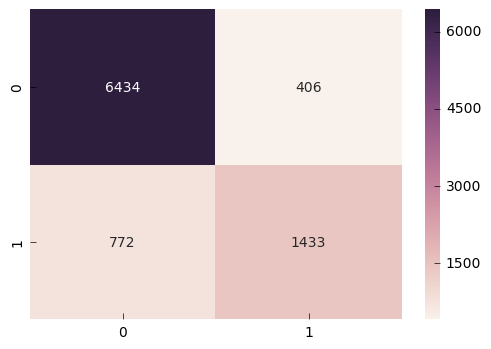

In [16]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search      import GridSearchCV
from sklearn.metrics          import fbeta_score, make_scorer
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.externals        import joblib

start_time=time()

Dump_clf = False
Load_clf = True

# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state=0)

if (Load_clf) :
    best_clf = joblib.load('best_clf.pkl')
else: # build and dump new classifier
    # TODO: Create the hyper-parameters list you wish to tune
    # parameters = { 'n_estimators' : [1, 3], 'max_depth': [1, 3] }
    #
    #  the following hyper-parameter values were recommended in the Prettenhofer tutorial
    #
    parameters = {'n_estimators': [100],
                  'learning_rate': [0.1, 0.05, 0.02, 0.01], 
                  'max_depth': [4, 6],
                  'min_samples_leaf': [3, 5, 9, 17], 
                  'max_features': [1.0, 0.3, 0.1]
                 }

    # TODO: Make an fbeta_score scoring object
    scorer = make_scorer(fbeta_score, beta=0.5)

    #  Use a stratified sample because there are a lot more examples of one class that the other in the input data
    cv = StratifiedShuffleSplit(y_train, test_size=0.2, random_state=42)

    # TODO: Perform grid search on the classifier using 'scorer' as the scoring method
    grid_obj = GridSearchCV(clf, param_grid=parameters, cv=cv, scoring=scorer)

    # TODO: Fit the grid search object to the training data and find the optimal parameters
    grid_fit = grid_obj.fit(X_train, y_train)

    # Get the estimator
    best_clf    = grid_obj.best_estimator_
    print("best params found by gridsearchCV=%s" % grid_obj.best_params_)
    # best_params = grid_obj.best_params_
    if (Dump_clf): joblib.dump(best_clf, 'best_clf.pkl')

best_name   = best_clf.__class__.__name__
best_params = best_clf.get_params()

print "Best classifier is %s" % best_name
print "Best params=%s\n"      % best_params

# Make predictions using the unoptimized and model
train_predictions = best_clf.predict(X_train)
test_predictions  = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions  = best_clf.predict(X_test)

end_time=time()

# Report the before-and-afterscores

print "Final accuracy score on the training data: {:.4f}".format(accuracy_score(y_train, train_predictions))
print "Final F-score on the training data: {:.4f}".format(fbeta_score(y_train, train_predictions, beta = 0.5))
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, test_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, test_predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "Total_time=%f secs." % (float(end_time) - start_time)

# Plot the confusion matrix

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, best_predictions), annot = True, fmt = '');
mpl.rcParams.update(inline_rc)

## Extra: Deviance plot

As shown in the above-referenced Prettenhofer tutorial, the **deviance plot** is a diagnostic tool for Gradient Boosted Regression Trees that helps determine whether the  model is overfitting.  It simultaneously plots the training and testing error (deviance) as a function of the number of trees (i.e., the number of trees is a representation for the model's complexity).  

The fitting procedure in the previous code cell saves the training error (deviance) est.train\_score\_ at each step as it adds an additional tree to the ensemble.  The deviance_plot() function retrieves that value and calculates the estimated loss (the test error) at each step on the testing set with the staged_predict() method.  That's the result we would have obtained if we had stopped the training procedure at that point.

As we see below, after the first five or ten trees, the error on the test set is almost constant and we gain very little by adding more trees.  The error on the training set continues to decline, as expected, because it overfits the training data as more trees are added.

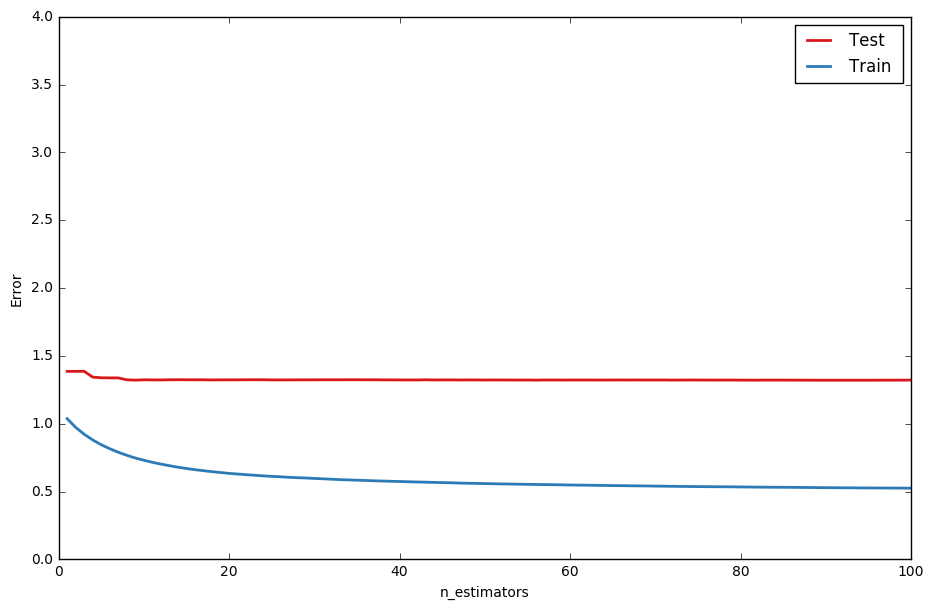

In [17]:
##
# deviance_plot() --
#  Plot the training and test error as a function of the number of trees in the model.
#
# this code is from the 2014 Prettenhofer tutorial
#

FIGSIZE = (11, 7)

def deviance_plot(est, X_test, y_test, ax=None, label='', train_color='#2c7bb6', 
                  test_color='#d7191c', alpha=1.0, ylim=(0, 10)):
    """Deviance plot for ``est``, use ``X_test`` and ``y_test`` for test error. """
    n_estimators = len(est.estimators_)
    test_dev = np.empty(n_estimators)

    for i, pred in enumerate(est.staged_predict(X_test)):
       test_dev[i] = est.loss_(y_test, pred)
       # print("pred=%s dev=%s" % (pred,test_dev[i]))

    if ax is None:
        fig = plt.figure(figsize=FIGSIZE)
        ax = plt.gca()
        
    ax.plot(np.arange(n_estimators) + 1, test_dev, color=test_color, label='Test %s' % label, 
             linewidth=2, alpha=alpha)
    ax.plot(np.arange(n_estimators) + 1, est.train_score_, color=train_color, 
             label='Train %s' % label, linewidth=2, alpha=alpha)
    ax.set_ylabel('Error')
    ax.set_xlabel('n_estimators')
    ax.set_ylim(ylim)
    return test_dev, ax

test_dev, ax = deviance_plot(best_clf, X_test, y_test, ylim=(0,4.0))
ax.legend(loc='upper right');

### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |     0.248           |       0.8630      |     0.8698        |
| F-score        |     0.292           |       0.7395      |   0.7494         |


**Answer: **  The optimized model's accuracy and F-score on the testing data are 0.8698 and 0.7494 respectively.  Both the accuracy and F-score are better in the optimized model than the unoptimized model.  These are much better than the benchmark predictor that provided an accuracy of 0.248 and F-score of 0.292.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?_

**Answer:**  Since we're using tree-based classifiers, we can get some intuition for the most important features by inspection of the bar plots produced in the Exploring the Data section.  For example, we see that in the **age** category there are about 7200 people or 16% of the total data set that are less than 25 years old and about 99% of them make less than or equal \$50,000 per year.  

Other plots reveal similar possibilities.  About 13% of the sample work less than 40 __**hours-per-week**__ and 98% of them make less than \$50,000 per year.  About 13% of the sample have less than nine years of education (__**education-num**__) and 96% of them make less than \$50,000 per year.  About 21,000 people are in the category __**Married-civ-spouse**__ and 93% of the 24,000 people in the other categories are in the <= 50K\$ per year group.  About 59% of the sample are outside the category __**relationship: husband**__ and 90% of them make less than or equal \$50,000 per year.

So, based on the accuracy of these tests, ranked as listed above, I expect to find age, hours-per-week, education-num, married-civ-spouse, and relationship-husband among the five most important tests.

The order in which the tests will be applied is difficult to predict because of how the trees in the classifier are constructed and the fact that our analysis does not take into account the effect of sequential application of the tests.  Nevertheless, we can get a clue for the likely order from the number of samples they affect and their correlations with the outcome variable that were calculated earlier.  Based on these results,  __**marital-status\_ Married-civ-spouse, relationship\_ Husband, education-num, age, and hours-per-week**__  would be applied in this order because they are the most highly correlated (using Pearson r) with the outcome variable.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

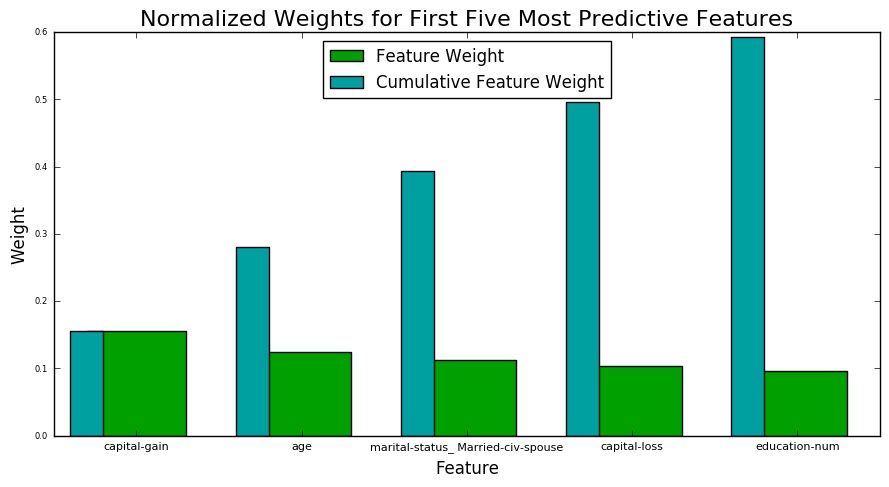

In [18]:
# TODO: Import a supervised learning model that has 'feature_importances_'
# from sklearn.ensemble import GradientBoostingClassifier

#clf = GradientBoostingClassifier(random_state=0)
clf = best_clf

# TODO: Train the supervised model on the training set 
# model = clf.fit(X_train, y_train)

# TODO: Extract the feature importances
# importances = model.feature_importances_
importances = clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

**Answer:**  The features selected by the gradient boosting classifier are similar to those I predicted.  Three of the five in my set are present.  I was somewhat surprised to find capital-gain and capital-loss.  But if we go back and look at the plots we see that several of the columns in the "Percentage of People" plots for the capital-gain and capital-loss features are almost purely comprised of people in one income category or the other.  Also, capital-gain is 6th in the list of features ranked by correlation with the outcome variable.  So, based on these characteristics, it's encouraging to see that the training procedure identified it as one of its most important features.  While there might not be many people in one income group or the other at any particular value for capital gain, the test should still be highly accurate.

I used Pearson's r as part of this analysis because it's often used as a first step in feature selection algorithms and it's an intuitively appealing choice.  If you had to choose a feature, it's sensible to choose one that is highly correlated with the outcome variable.  

The visualization shown above differs somewhat from what I expected to see.  It shows small differences between weights assigned to each feature.  I expected to see a wider variation in weight values because of the variation in correlation values that I observed.   In retrospect, this is to be expected because the basic tree growing algorithm is probably using a different criterion such as reduction in entropy when deciding how to split the data and this would assign different weights to features than might be predicted by their correlation with the outcome variable.

## Extra: Comparison to Logistic Regression

It's instructive to compare the most important features for the gradient boosting classifier to those selected by a parameter-based model like the logistic regression (LR) classifier.  As we see below, LR's top five features, sorted by their odds ratios, are capital-gain, capital-loss, hours-per-week, education-num, and age.  Interestingly, four of the five are also selected by the gradient boosting classifier.

In [31]:
#
# Logistic regression applied to our data set
#   Purpose: compare coefficients, sorted by odds ratios, to feature importances of GBRT
#       code from grader (thanks!!)
#

from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)

scores, pvalues = chi2(X_train, y_train)

coef             = pd.DataFrame(zip(clf.coef_.T, np.exp(clf.coef_).T))
coef.columns     = ['Coef_','Odds_Ratio_']
coef['P_values'] = pvalues
coef.index       = X_train.columns

coef.Coef_       = coef.Coef_.astype(np.float64)
coef.Odds_Ratio_ = coef.Odds_Ratio_.astype(np.float64)

print(coef.sort_values(by=['Odds_Ratio_'], ascending=False)[0:10])

                                        Coef_   Odds_Ratio_       P_values
capital-gain                        18.590046  1.184552e+08  2.403480e-202
capital-loss                         2.656614  1.424796e+01   2.981337e-79
hours-per-week                       2.609291  1.358942e+01   2.661253e-16
education-num                        1.683687  5.385377e+00   1.472909e-43
age                                  1.673663  5.331660e+00   8.999303e-50
marital-status_ Married-AF-spouse    1.305324  3.688885e+00   1.761838e-02
education_level_ Prof-school         1.199446  3.318277e+00  2.612085e-197
marital-status_ Married-civ-spouse   1.061707  2.891302e+00   0.000000e+00
native-country_ France               1.034131  2.812661e+00   3.057829e-03
education_level_ Doctorate           0.952474  2.592115e+00  9.572476e-121


### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With fewer features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [20]:
# Import functionality for cloning a model
from sklearn.base          import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced  = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
start_time = time()
clf        = (clone(best_clf)).fit(X_train_reduced, y_train)
end_time   = time()

# Make new predictions
start_predict_time  = time()
reduced_predictions = clf.predict(X_test_reduced)
end_predict_time    = time()

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Training time = %f seconds" % float(end_time-start_time)
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))
print "Testing = %f seconds" % float(end_predict_time-start_predict_time)

Final Model trained on full data
------
Training time = 7.440000 seconds
Accuracy on testing data: 0.8698
F-score on testing data: 0.7494

Final Model trained on reduced data
------
Accuracy on testing data: 0.8586
F-score on testing data: 0.7267
Testing = 0.062000 seconds


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:**  The final model's F-score and accuracy on the reduced data (0.7267 and 0.8586) are only slightly less than that of the model trained on the full data (0.7494 and 0.8698).  Training time was reduced by about a factor of three by using only five features (7.4 seconds vs. 23.2 seconds for the full data).  However, this was at a cost of a full percentage point drop in accuracy.  

Considering the fact that training is performed once offline and that missing a potential donor because of reduced accuracy is unacceptable to me, I would not consider using the reduced data as a training set unless training could not be completed in a reasonable time.  For example, I'd be willing to wait two days but one week would be unacceptable.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Extra: Feature selection with PCA

To gain some insight into how PCA's feature reduction compares to the use of the most important features selected by the GBRT, the 103 features were reduced to five and 40 with PCA and the GBRT was retrained and applied to the test set.

The ability of a reduced set of PCA's components to provide comparable performance is indicated by the total variance explained by the selected components.  If that sum is high (e.g., greater than 98%) with a small number of components (e.g., five) then we'd expect to see those features provide accuracy similar to that of the complete feature set.  In this case, the five PCA components explained 45% of the variance and we obtained an 82% accuracy (F = 0.599) and 40 PCA components explained 96% of the variance and provided 83% accuracy (F = 0.665).  

GBRT performed much better when a subset of features were selected using their importance values.  Five features gave us 85.9% accuracy and F = 0.7267.  This was to be expected because of the pca.explained\_variance\_ratio\_ array that does not show a significant falloff in the first few coefficients.  

|     GBRT features:     | 5 PCA | 40 PCA            | 5 most important | 103 original |
| :------------: | :-----------------: | :---------------: | :-------------: | :-------------: |
| Accuracy Score |     0.821           |       0.833      |     0.859        | 0.863 |
| F-score        |     0.636           |       0.665      |   0.727         | 0.740 |
| pred. time (secs) | 0.043   |  0.069   | 0.418  | 0.100 |


In [23]:
#
# apply_PCA(clf, N_components): apply classifier clf to our training and test data both before and 
#    after reduction of the feature set to N_components with PCA.  
#

from sklearn.decomposition import PCA

def apply_PCA(clf, N_components):
    pca = PCA(n_components=N_components)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca  = pca.transform(X_test)
    display(HTML("<h3>Applying PCA with %d features</h3>" % N_components))
    print "Variance explained by each PCA feature:"
    print pca.explained_variance_ratio_
    print "total explained variance=%f" % sum(pca.explained_variance_ratio_)

    clf_name = clf.__class__.__name__
    clf_start = time()
    results_orig = train_predict(clf, n_training, X_train, y_train, X_test, y_test)
    print "Full %s (%d features): %s: %s" % (clf_name, len(encoded), clf_name, results_orig)
    pca_start = time()
    results_pca = train_predict(clf, n_training, X_train_pca, y_train, X_test_pca, y_test)
    print "Reduced %s (%d PCA components as features): %s: %s" % (clf_name, N_components, clf_name, results_pca)
    pca_finish = time()
    print "%s time = %f secs. pca time=%f secs\n" % (clf_name, pca_start-clf_start, pca_finish-pca_start)

apply_PCA( GradientBoostingClassifier(random_state=0), 5 )
apply_PCA( GradientBoostingClassifier(random_state=0), 40 )

Variance explained by each PCA feature:
[ 0.19437471  0.07891934  0.06954545  0.05822993  0.0492296 ]
total explained variance=0.450299
GradientBoostingClassifier trained on 36177 samples.
Full GradientBoostingClassifier (103 features): GradientBoostingClassifier: {'pred_time': '0.0990', 'f_test': '0.740', 'train_time': '23.8110', 'acc_train': '0.857', 'acc_test': '0.863', 'f_train': '0.734'}
GradientBoostingClassifier trained on 36177 samples.
Reduced GradientBoostingClassifier (5 PCA components as features): GradientBoostingClassifier: {'pred_time': '0.0430', 'f_test': '0.636', 'train_time': '8.0270', 'acc_train': '0.810', 'acc_test': '0.821', 'f_train': '0.599'}
GradientBoostingClassifier time = 23.926000 secs. pca time=8.079000 secs



Variance explained by each PCA feature:
[ 0.19437471  0.07891934  0.06954545  0.05822993  0.0492296   0.04634585
  0.04196724  0.03281896  0.03053125  0.02729623  0.02681009  0.0251878
  0.02258161  0.02087869  0.01893301  0.01821026  0.01656879  0.01555373
  0.01282481  0.01202748  0.01148731  0.01072673  0.01037237  0.00978592
  0.00925893  0.0083293   0.00802459  0.00787124  0.00765769  0.00750063
  0.00722205  0.00716784  0.00664354  0.00604021  0.00485842  0.00454302
  0.00403875  0.00394644  0.00353601  0.00325143]
total explained variance=0.961097
GradientBoostingClassifier trained on 36177 samples.
Full GradientBoostingClassifier (103 features): GradientBoostingClassifier: {'pred_time': '0.1010', 'f_test': '0.740', 'train_time': '23.5920', 'acc_train': '0.857', 'acc_test': '0.863', 'f_train': '0.734'}
GradientBoostingClassifier trained on 36177 samples.
Reduced GradientBoostingClassifier (40 PCA components as features): GradientBoostingClassifier: {'pred_time': '0.0690', 'f_tes

## Extra: Ordinal encoding for categorical features

The Prettenhofer tutorials say that tree-based methods work well with ordinal encoding and that this is preferred in place of one-hot encoding.  I tested this with the following code fragment that trains and tests the GradientBoostingClassifer.  This produced exactly the same performance (accuracy and F test on the testing data), except for a slight difference in run times, as the one-hot encoded features.  Therefore, I'd conclude that ordinal encoding might provide some internal efficiency improvement, that we might see at larger scales, but there is no reason to conclude that it would improve accuracy.

In [26]:
#
# encode the categorical features as ordinal values and re-run GBRT to test the Prettenhofer advice
#   that tree-based methods in sklearn prefer ordinal to one-hot values.  It sounded like using ordinal values
#   would improve accuracy, but there was no effect.
#
features_gbrt              = features_raw
for col_name  in categorical:
    features_gbrt[col_name] = data[col_name].astype('category')
cat_columns                = features_gbrt.select_dtypes(['category']).columns
features_gbrt[cat_columns] = features_gbrt[cat_columns].apply(lambda x: x.cat.codes).astype(float)

print "GBRT features:"
display(features_gbrt[:3])

X_train_gbrt, X_test_gbrt, y_train_gbrt, y_test_gbrt = \
    train_test_split(features_gbrt, income, test_size = 0.2, random_state = 0)
num_training = len(X_train_gbrt)

results = train_predict(GradientBoostingClassifier(random_state=0), num_training, X_train, y_train, X_test, y_test)

print "GradientBoostingClassifier (%d features): %s" % (len(X_train_gbrt.columns), results)

## http://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe

GBRT features:


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,5.0,9.0,0.800000,4.0,0.0,1.0,4.0,1.0,0.02174,0.0,0.397959,38.0
1,0.452055,4.0,9.0,0.800000,2.0,3.0,0.0,4.0,1.0,0.00000,0.0,0.122449,38.0
2,0.287671,2.0,11.0,0.533333,0.0,5.0,1.0,4.0,1.0,0.00000,0.0,0.397959,38.0


GradientBoostingClassifier trained on 36177 samples.
GradientBoostingClassifier (13 features): {'pred_time': '0.0970', 'f_test': '0.740', 'train_time': '22.1390', 'acc_train': '0.857', 'acc_test': '0.863', 'f_train': '0.734'}


## Extra: Significant issue: How to choose the best classifier?

The results of each classifier when trained and tested on all the data are shown below.  We see that GBRT gives the best performance but other classifiers are close.  AdaBoost has an accuracy only 1.2% less than GBRT.  Logistic is only 1% less than that.  

|     Classifier     | Accuracy score | F-score  | run time (secs) |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| SGD  | 0.838 | 0.676 | 0.006 |
| Logistic | 0.848 | 0.699 | 0.018 |
| Bagging  | 0.840 | 0.676 | 0.684 |
| AdaBoost | 0.858 | 0.712 | 0.700 |
| Naive Bayes | 0.608 | 0.428 | 0.237 |
| KNN | 0.820 | 0.753 | 198.371 |
| SVC | 0.830 | 0.678 | 131.205 |
| Decision Tree | 0.819 | 0.628 | 0.048 |
| Random Forest | 0.838 | 0.672 | 0.307 |
| GradBoost Trees (unoptimized) | 0.863 | 0.740 | 0.100 |
| GradBoost Trees (optimized) | 0.870 | 0.749 | 0.195 |

These results raise a significant question about how we should select the best classifier for a given problem.  It seems that GBRT was the right choice, and this is bolstered by our earlier analysis.  But maybe a more highly tuned version of another classifier could have done as well or better?  It seems as if there is a lot of art in deciding which classifier should be used.  I look forward to learning about how to make this decision more quantitatively.

SGDClassifier trained on 362 samples.
0: SGDClassifier: {'pred_time': '0.0000', 'f_test': '0.240', 'train_time': '0.0000', 'acc_train': '0.773', 'acc_test': '0.769', 'f_train': '0.227'}
SGDClassifier trained on 3618 samples.
1: SGDClassifier: {'pred_time': '0.0010', 'f_test': '0.622', 'train_time': '0.0370', 'acc_train': '0.810', 'acc_test': '0.816', 'f_train': '0.581'}
SGDClassifier trained on 36177 samples.
2: SGDClassifier: {'pred_time': '0.0060', 'f_test': '0.669', 'train_time': '0.3260', 'acc_train': '0.827', 'acc_test': '0.829', 'f_train': '0.653'}


LogisticRegression trained on 362 samples.
0: LogisticRegression: {'pred_time': '0.0050', 'f_test': '0.612', 'train_time': '0.0050', 'acc_train': '0.843', 'acc_test': '0.812', 'f_train': '0.694'}
LogisticRegression trained on 3618 samples.
1: LogisticRegression: {'pred_time': '0.0050', 'f_test': '0.675', 'train_time': '0.0620', 'acc_train': '0.837', 'acc_test': '0.837', 'f_train': '0.672'}
LogisticRegression trained on 36177 samples.

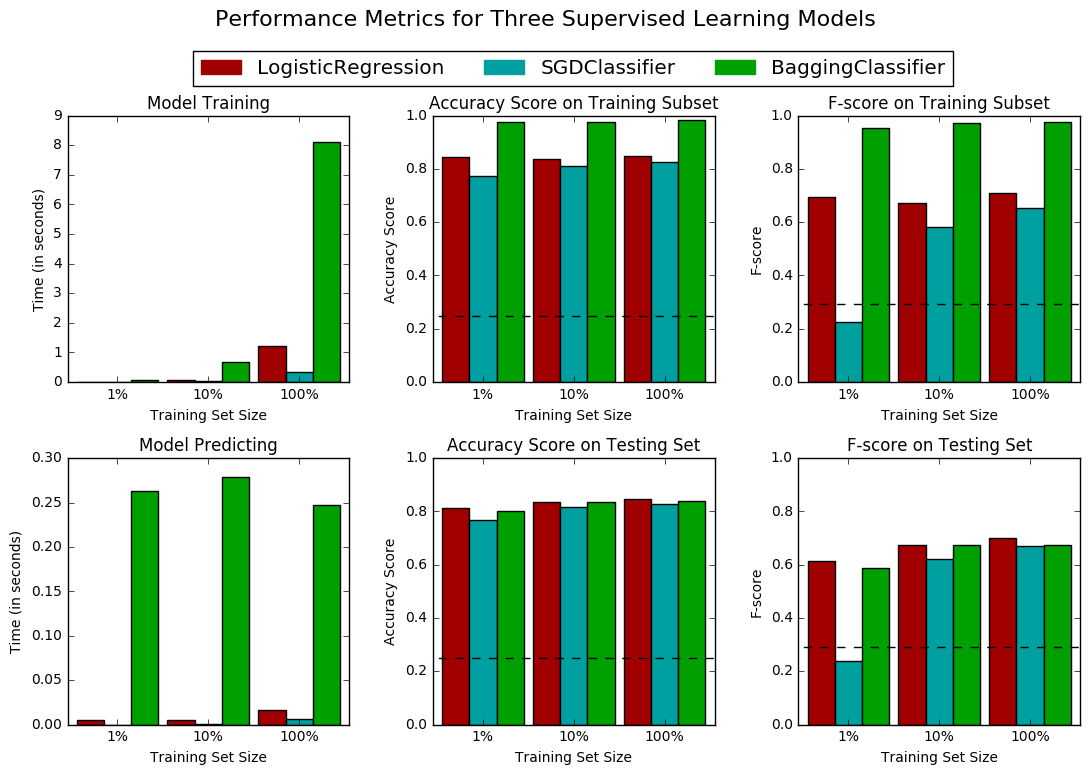

AdaBoostClassifier trained on 362 samples.
0: AdaBoostClassifier: {'pred_time': '0.2170', 'f_test': '0.610', 'train_time': '0.3940', 'acc_train': '0.897', 'acc_test': '0.810', 'f_train': '0.812'}
AdaBoostClassifier trained on 3618 samples.
1: AdaBoostClassifier: {'pred_time': '0.2540', 'f_test': '0.702', 'train_time': '0.7990', 'acc_train': '0.840', 'acc_test': '0.850', 'f_train': '0.680'}
AdaBoostClassifier trained on 36177 samples.
2: AdaBoostClassifier: {'pred_time': '0.2160', 'f_test': '0.725', 'train_time': '5.5960', 'acc_train': '0.850', 'acc_test': '0.858', 'f_train': '0.712'}


AdaBoostClassifier trained on 362 samples.
0: AdaBoostClassifier: {'pred_time': '0.2220', 'f_test': '0.610', 'train_time': '0.4000', 'acc_train': '0.897', 'acc_test': '0.810', 'f_train': '0.812'}
AdaBoostClassifier trained on 3618 samples.
1: AdaBoostClassifier: {'pred_time': '0.2010', 'f_test': '0.702', 'train_time': '0.7000', 'acc_train': '0.840', 'acc_test': '0.850', 'f_train': '0.680'}
AdaBoostClassi

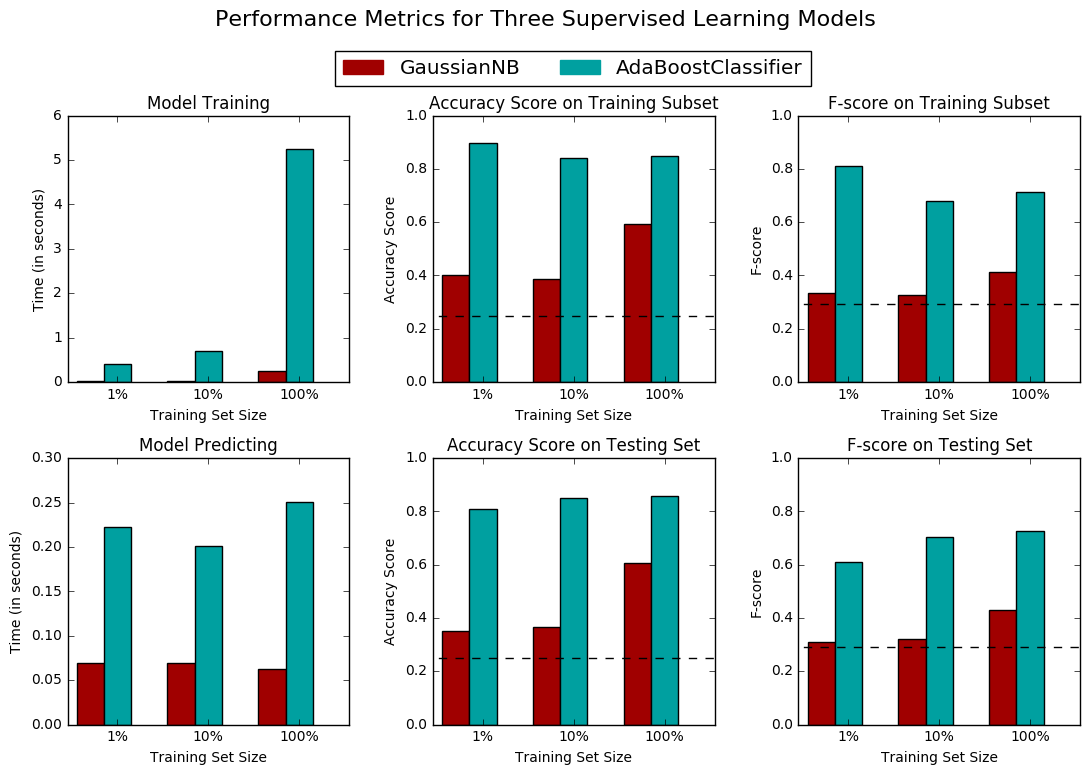

KNeighborsClassifier trained on 362 samples.
0: KNeighborsClassifier: {'pred_time': '1.7660', 'f_test': '0.593', 'train_time': '0.0150', 'acc_train': '0.867', 'acc_test': '0.805', 'f_train': '0.750'}
KNeighborsClassifier trained on 3618 samples.
1: KNeighborsClassifier: {'pred_time': '12.4430', 'f_test': '0.627', 'train_time': '0.0380', 'acc_train': '0.860', 'acc_test': '0.818', 'f_train': '0.724'}
KNeighborsClassifier trained on 36177 samples.
2: KNeighborsClassifier: {'pred_time': '70.2020', 'f_test': '0.632', 'train_time': '2.8200', 'acc_train': '0.873', 'acc_test': '0.820', 'f_train': '0.753'}




C:\Users\hull\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 362 samples.
0: SVC: {'pred_time': '0.5930', 'f_test': '0.000', 'train_time': '0.0310', 'acc_train': '0.760', 'acc_test': '0.756', 'f_train': '0.000'}
SVC trained on 3618 samples.
1: SVC: {'pred_time': '5.7250', 'f_test': '0.640', 'train_time': '2.7920', 'acc_train': '0.833', 'acc_test': '0.822', 'f_train': '0.670'}
SVC trained on 36177 samples.
2: SVC: {'pred_time': '47.7870', 'f_test': '0.659', 'train_time': '282.2510', 'acc_train': '0.837', 'acc_test': '0.830', 'f_train': '0.678'}


RandomForestClassifier trained on 362 samples.
0: RandomForestClassifier: {'pred_time': '0.0310', 'f_test': '0.594', 'train_time': '0.0690', 'acc_train': '0.977', 'acc_test': '0.805', 'f_train': '0.979'}
RandomForestClassifier trained on 3618 samples.
1: RandomForestClassifier: {'pred_time': '0.0670', 'f_test': '0.661', 'train_time': '0.1540', 'acc_train': '0.983', 'acc_test': '0.832', 'f_train': '0.977'}
RandomForestClassifier trained on 36177 samples.
2: RandomForestClassifier: {'pred_ti

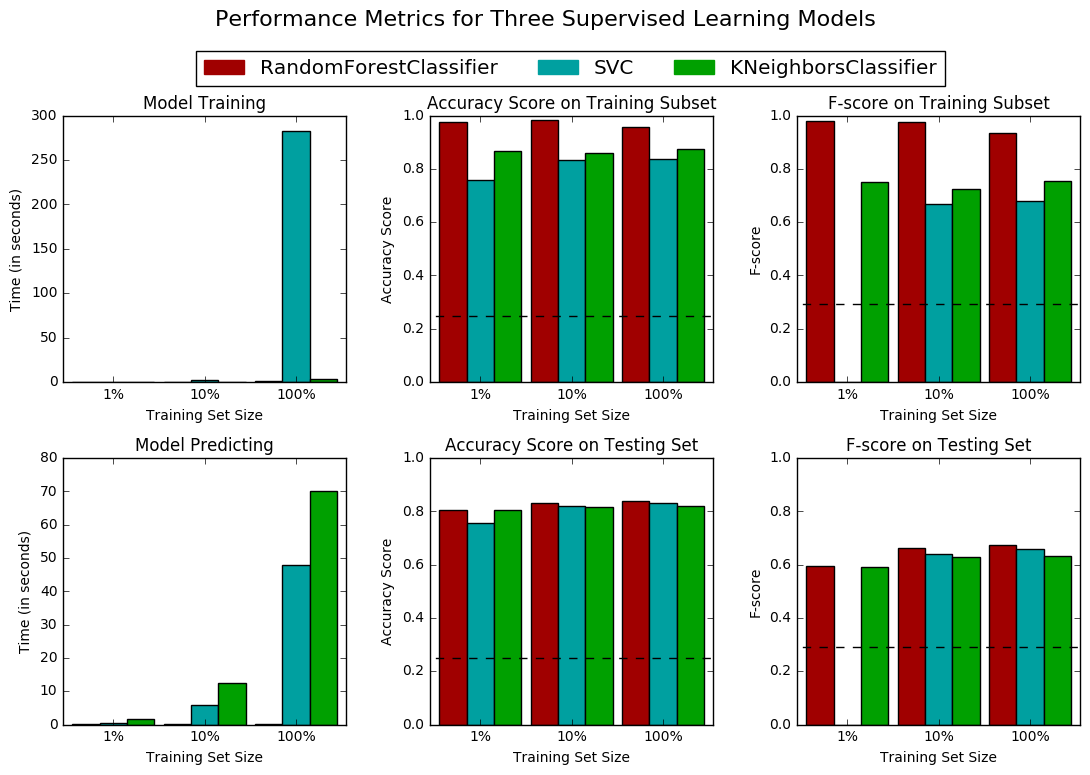

In [25]:
apply_three_classifiers( SGDClassifier(), LogisticRegression(random_state=0), BaggingClassifier())
apply_three_classifiers( AdaBoostClassifier(),AdaBoostClassifier(), GaussianNB())
apply_three_classifiers( KNeighborsClassifier(), SVC(), RandomForestClassifier(random_state=0))